# Problem Statement
Crime in Chicago has been worrisome to the Chicago PD. Reported crimes have been tracked on a daily basis since 2001 and have been provided in the project data file. The Chicago PD would like to drastically reduce the spate of violent crimes reported in the city. 

Being effective involves knowing crime patterns and where they are likely to occur. It also involves equipping the Police Department appropriately. This projects conducts a full data analytics and predictive modeling to uncover insights from the data that can be used to effectively mobilize and respond to crimes in shorter time cycles. Only shows gleaning and insights that can help Chicago PD determine What type of crimes to prepare for, Where these crimes are most likely to occur, What days of the week and periods to expect these crimes

In [1]:
# Import Libraries

# Data science
import pandas as pd
import numpy as np
import statistics
from numpy import set_printoptions
import datetime
from dateutil.parser import parse
from datetime import datetime
import missingno as msno

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.model_selection import train_test_split # for train test split method
from sklearn.linear_model import LogisticRegression # the algorithm
from sklearn import metrics
from sklearn.model_selection import KFold # for Kfold method
from sklearn.model_selection import cross_val_score # this is important for kfold and leave one out
from sklearn.model_selection import LeaveOneOut # for leave one out method
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.feature_selection import SelectKBest, RFE, f_regression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

#Classification Models
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.multioutput import MultiOutputClassifier # Multi Output Classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression Classification
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes Classification
from sklearn.neighbors import KNeighborsClassifier # KNN Classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA Classification
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classification
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import pickle
import skimpy

# Plotting Pretty figures and avoiding blurry images
%config InlineBackend.figure_format = 'retina'

# Larger scale for plots in notebooks
sns.set_context('notebook')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

In [2]:
# Load the data
filepath = '/Users/macbook/Desktop/DATA SCIENCE WORKSPACE/'
filename = 'chicago_crime_data.csv'
df = pd.read_csv(filepath+filename)

# Expand all the coumns
 

# Exploratory Analysis

In [3]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 2278726 │ │ string      │ 10    │                                                         │
│ │ Number of columns │ 23      │ │ float64     │ 7     │                                                         │
│ └───────────────────┴─────────┘ │ int64       │ 4     │                                                         │
│                                 │ bool        │ 2     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA      ┃ NA %     ┃ mean     ┃ sd       ┃ p0   ┃ p25     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Unnamed: 0       │       0 │        0 │  1100000 │   660000 │    0 │  570000 │ 1700000 │  2300000 │ ██████ │  │
│ │ ID               │       0 │        0 │  6900000 │  3400000 │  640 │ 3700000 │ 9900000 │ 13000000 │ ▃█▇▇▇▇ │  │
│ │ Beat             │       0 │        0 │     1200 │      700 │  110 │     620 │    1700 │     2500 │ ▇█▆▅▄▅ │  │
│ │ District         │      12 │  0.00053 │       11 │      6.9 │    1 │       6 │      17 │       31 │ ▇█▆▅▃  │  │
│ │ Ward             │  180000 │      8.1 │       23 │       14 │    1 │      10 │      34 │       50 │ █▅▅▆▄▄ │  │
│ │ Community Area   │  180000 │      8.1 │       38 │       22 │    0 │      23 │      57 │       77 │ ▅█▇▆▃▇ │  │
│ │ X Coordinate     │   24000 │      1.1 │  1200000 │    17000 │    0 │ 1200000 │ 1200000 │  1200000 │      █ │  │
│ │ Y Coordinate     │   24000 │      1.1 │  1900000 │    32000 │    0 │ 1900000 │ 1900000 │  2000000 │      █ │  │
│ │ Year             │       0 │        0 │     2000 │        6 │ 2000 │    2000 │    2000 │     2000 │ █▆▆▄▄▃ │  │
│ │ Latitude         │   24000 │      1.1 │       42 │    0.088 │   37 │      42 │      42 │       42 │      █ │  │
│ │ Longitude        │   24000 │      1.1 │      -88 │    0.061 │  -92 │     -88 │     -88 │      -88 │      █ │  │
│ └──────────────────┴─────────┴──────────┴──────────┴──────────┴──────┴─────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA        ┃ NA %          ┃ words per row          ┃ total words       ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ Case Number                       │         1 │       4.4e-05 │                      1 │           2300000 │  │
│ │ Date                              │         0 │             0 │                      1 │           2300000 │  │
│ │ Block                             │         0 │             0 │                      1 │           2300000 │  │
│ │ IUCR                              │         0 │             0 │                      1 │           2300000 │  │
│ │ Primary Type                      │         0 │     

In [3]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [4]:
# Inspect the DataFrame using the shape, info, and head in pandas.

# Print the first 5 elements using .head()
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [5]:
# exploring the shape of the dataset
df.shape

(2278726, 23)

- There are two million, two hundred and seventy eight thousand, seven hundred and twenty six (2,278,726) rows in the data.
- There are twenty three (23) columns in the data.

In [6]:
# Check the data types of the columns
df.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              string
Date                     string
Block                    string
IUCR                     string
Primary Type             string
Description              string
Location Description     string
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 string
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               string
Latitude                float64
Longitude               float64
Location                 string
dtype: object

In [7]:
#number of unique values in each features
df.nunique()

Unnamed: 0              2278726
ID                      2278726
Case Number             2278678
Date                    1343546
Block                     54347
IUCR                        392
Primary Type                 35
Description                 515
Location Description        198
Arrest                        2
Domestic                      2
Beat                        304
District                     23
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              73335
Y Coordinate             122589
Year                         22
Updated On                 4461
Latitude                 544919
Longitude                544655
Location                 545376
dtype: int64

### Issues with the data

Data Quality

- There are missing values to be dropped.
- Covert categorical data to Numeric

Data Tidiness

- Date Column to be splitted into date and time in their respective units of measurements. 
- Create an extra column to determine the season of the event.

In [8]:
# Check for missingness in the dataset
df.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

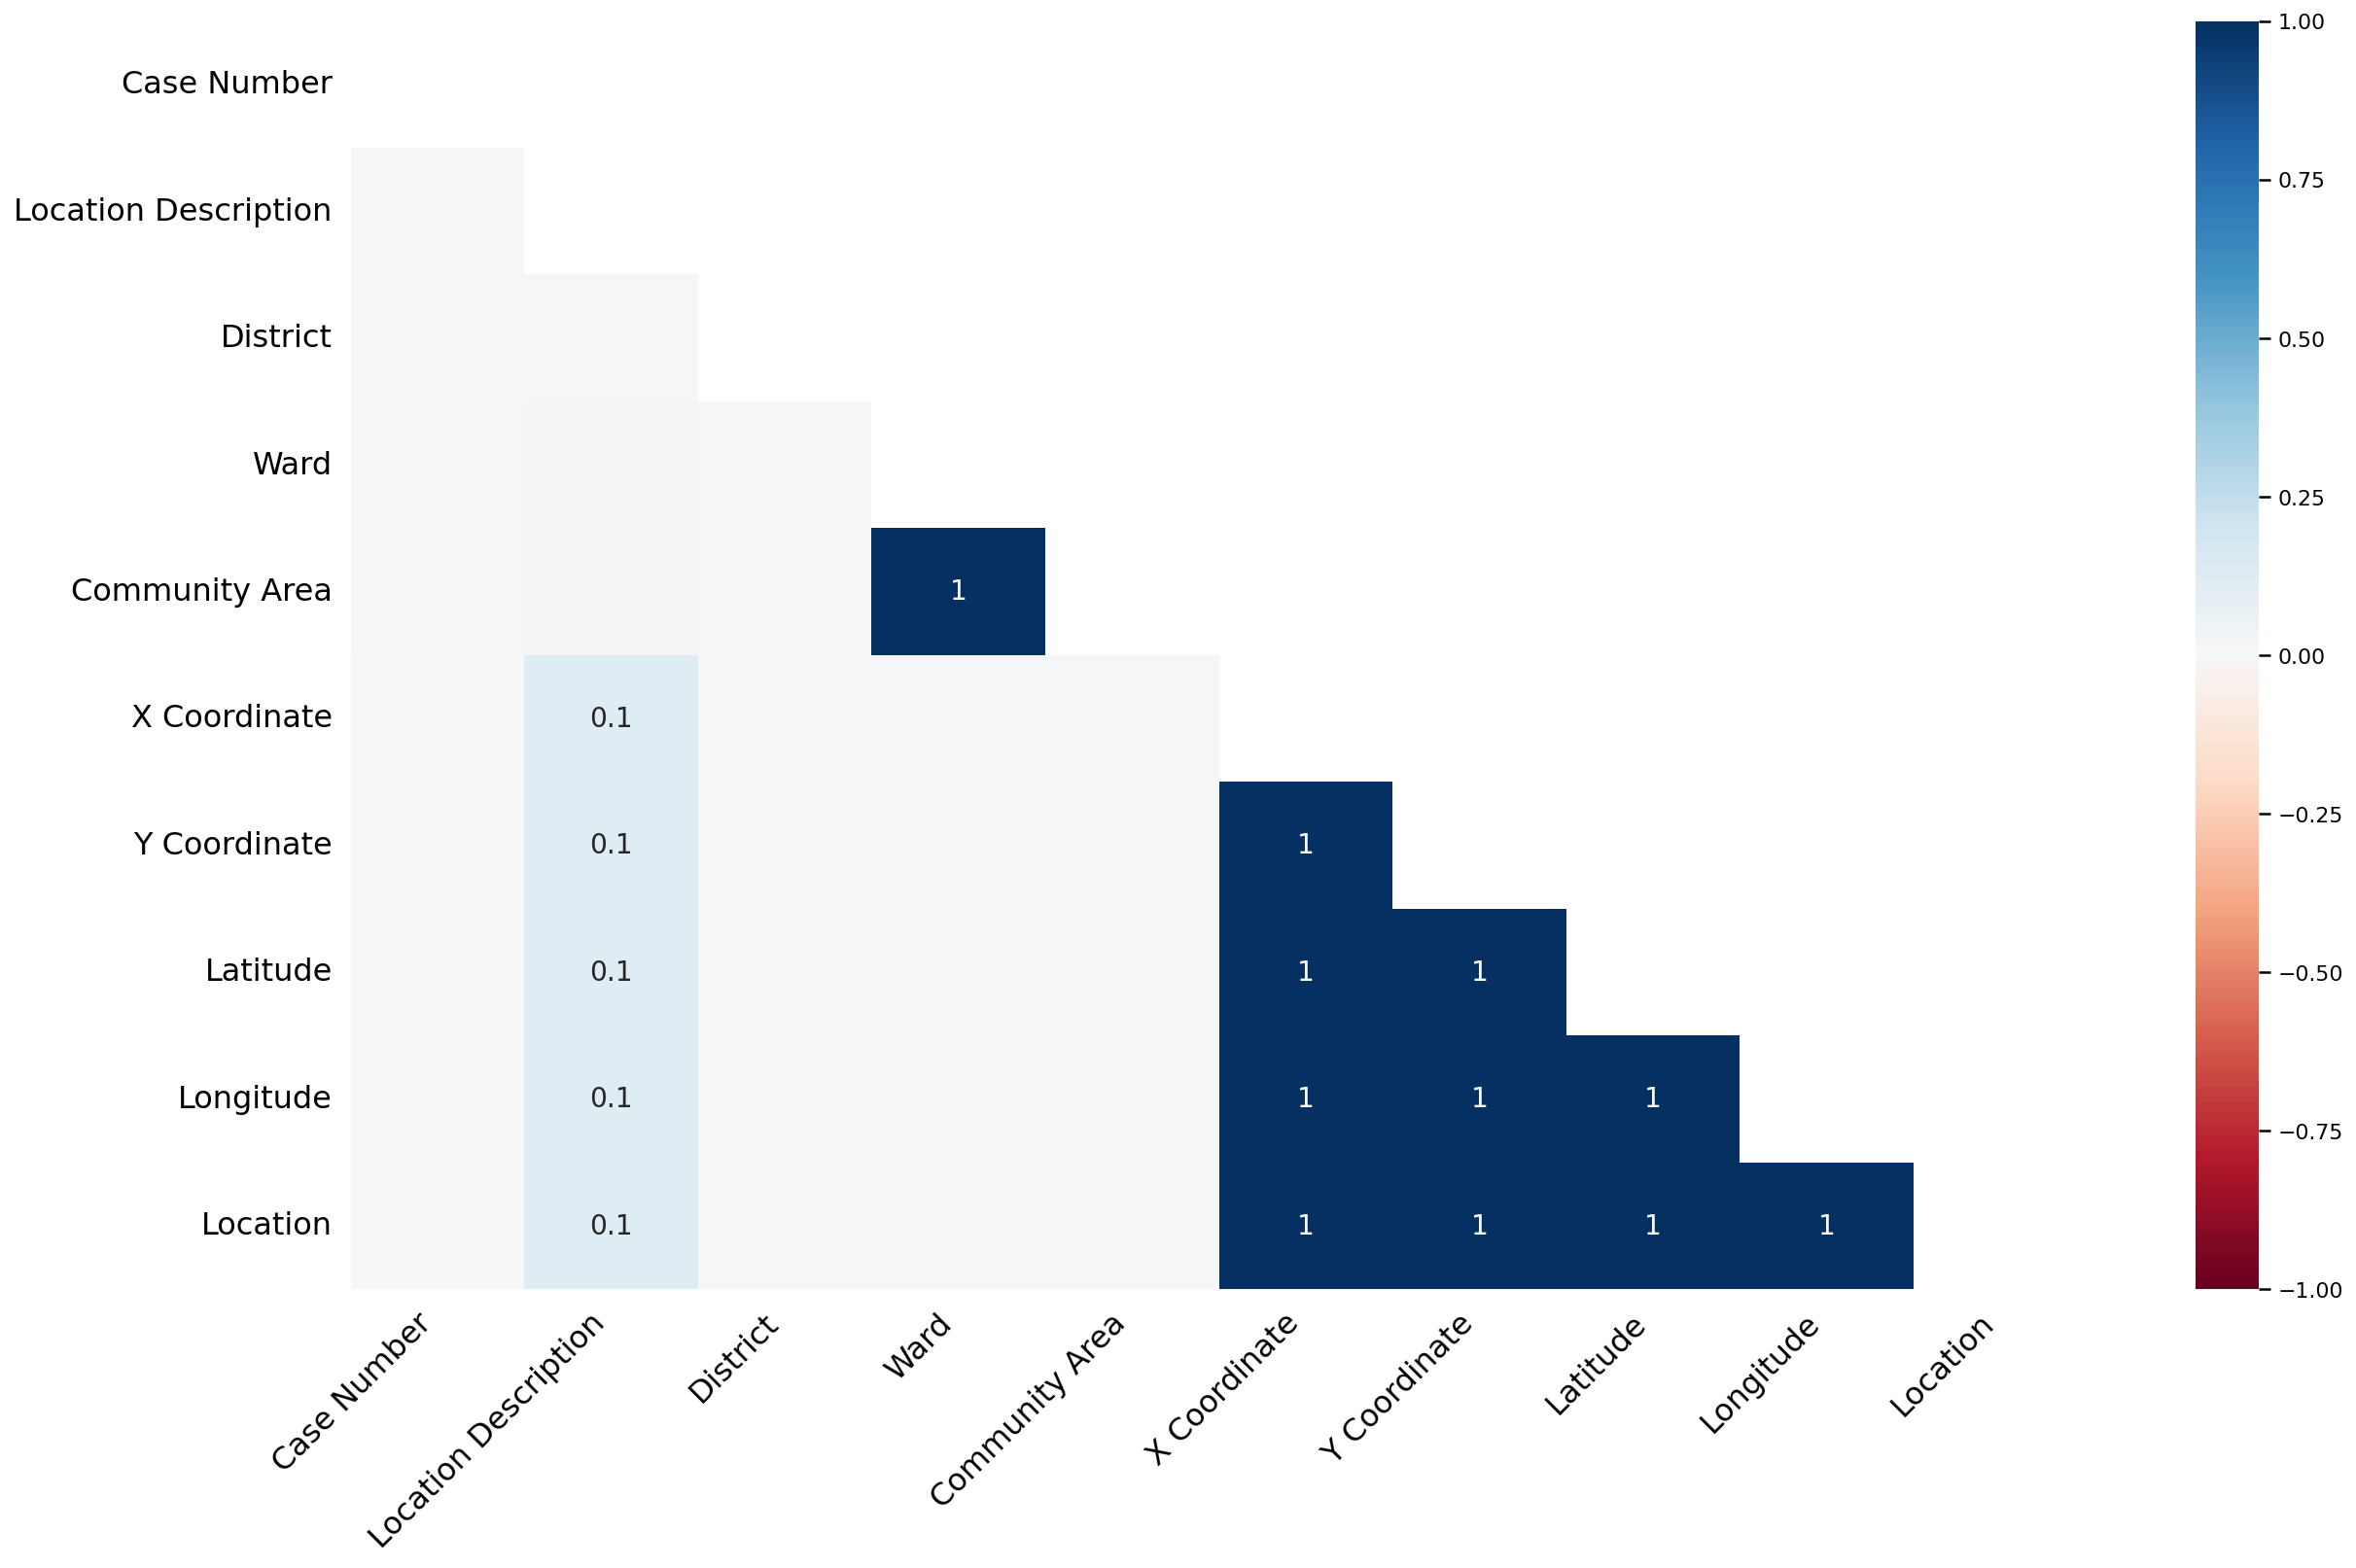

In [9]:
# missingness matrix
msno.heatmap(df);
plt.savefig('missing_values')

In [10]:
# Calculate the percentage of missing value
valueList = list()
colList= list()
for col in df.columns:
    percentageMissing = np.mean(df[col].isnull()) * 100
    colList.append(col)
    valueList.append(percentageMissing)
percentageMissingDf = pd.DataFrame()
percentageMissingDf['col'] = colList
percentageMissingDf['percentageMissing'] = valueList
percentageMissingDf

,col,percentageMissing
0,Unnamed: 0,0.000000
1,ID,0.000000
2,Case Number,0.000044
3,Date,0.000000
4,Block,0.000000
5,IUCR,0.000000
6,Primary Type,0.000000
7,Description,0.000000
8,Location Description,0.126255
9,Arrest,0.000000


#### How they were solved


There missing values in this data are less than 10%. I have decided to drop them as they would not have effects on our data.

In [11]:
# drop rows with missing values
df.dropna(axis=0, inplace=True)

In [12]:
# Let us check for any duplicates
sum(df.duplicated())

0

In [13]:
# Let's check for the number of unique values in each column
df.nunique()

Unnamed: 0              2070581
ID                      2070581
Case Number             2070535
Date                    1230193
Block                     33841
IUCR                        389
Primary Type                 35
Description                 511
Location Description        198
Arrest                        2
Domestic                      2
Beat                        303
District                     23
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              70173
Y Coordinate             117135
Year                         22
Updated On                 3620
Latitude                 450183
Longitude                449993
Location                 450496
dtype: int64

In [14]:
# re-check for missingness in the dataset
df.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

# Feature Engineering 

- To predict the crime type by day, features such as day, month and period will be extracted from the 'Date' field.
- Also, I want to extract them to make some visualization that unconver more insights in the data.
- To aid with visualization, Another thing to do is to determine what category of the day the crime occurs. This can help to know what type of crimee is most prevalent at individual time.
- Also, I have decided to create a column that tells which season the crime occured.

In [15]:
# The date crime was committed and the date updated are in 'Object' dtype, to change the data type into datetime 
from dateutil.parser import parse
from datetime import datetime
tCol = df.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and (int(row[0][11:13])==12 or int(row[0][11:13])<=4):
        period = 'Afternoon'
    elif row[1] =='PM' and (int(row[0][11:13])>4 and int(row[0][11:13])<=7):
        period = 'Evening' 
    elif row[1] =='PM' and (int(row[0][11:13])>7 and int(row[0][11:13])<=11):
        period = 'Night'
    else:
        period = 'Unknown'
        
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
print(len(dayList), len(monthList), len(periodList))    

df['month'] = monthList
df['day'] = dayList
df['period']= periodList
df.head()

2070581 2070581 2070581


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,day,period
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)",Jul,Sat,Afternoon
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)",Jul,Tue,Morning
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)",Apr,Fri,Morning
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)",Jul,Mon,Morning
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)",Jul,Sun,Morning


In [16]:
# The date crime was committed and the date updated are in 'Object' dtype, to change the data type into datetime 
df["Date"] = pd.to_datetime(df["Date"])
df["Updated On"] = pd.to_datetime(df["Updated On"])

In [17]:
# Extract the date and time into individual components, this will be useful for some visualization
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Minutes'] = df['Date'].dt.minute
df['Seconds'] = df['Date'].dt.second

# Extract the date and time into individual components, this will be useful for some visualization
df['Year Updated'] = df['Updated On'].dt.year
df['Month Updated'] = df['Updated On'].dt.month
df['Day Updated'] = df['Updated On'].dt.day
df['Hour Updated'] = df['Updated On'].dt.hour
df['Minutes Updated'] = df['Updated On'].dt.minute
df['Seconds Updated'] = df['Updated On'].dt.second

In [18]:
# a function to create a column that tell us the category of the day, each crime occured.
def daytime(x):
    if (x>6) and (x<9):
        return 'Early Morning'
    elif (x > 9) and (x < 12):
        return 'Late Morning'
    elif (x == 12):
        return 'Noon'
    elif (x > 12) and (x < 16):
        return 'Afternoon'
    elif (x > 16) and (x < 19):
        return 'Evening'
    elif (x > 19) and (x < 23):
        return 'Night'
    else:
        return 'Midnight'

In [19]:
# a function to create a column that tell us the season, each crime occured.
def season(x):
    if (x==12) or (x<3):
        return 'Winter'
    elif x < 6:
        return 'Spring'
    elif x < 9:
        return 'Summer'
    else:
        return 'Autumn'

In [20]:
# Apply the functions
df['Season'] = df['Month'].apply(season)
df['Daytime_of_Occurence'] = df['Hour'].apply(daytime)

In [21]:
case_dict = df['Case Number'].value_counts()
case_dict

HJ104730    3
HK172551    3
JE230612    2
JB359724    2
HR146859    2
           ..
HM376301    1
HH579428    1
JB319178    1
HS554919    1
HK420105    1
Name: Case Number, Length: 2070535, dtype: Int64

In [22]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,day,period,Month,Day,Hour,Minutes,Seconds,Year Updated,Month Updated,Day Updated,Hour Updated,Minutes Updated,Seconds Updated,Season,Daytime_of_Occurence
0,0,6407111,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,2018-02-28 15:56:25,41.739980,-87.555120,"(41.739979622, -87.555120042)",Jul,Sat,Afternoon,7,26,14,30,0,2018,2,28,15,56,25,Summer,Afternoon
1,1,11398199,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,2018-08-07 16:02:59,41.726922,-87.599747,"(41.726922145, -87.599746995)",Jul,Tue,Morning,7,31,10,57,0,2018,8,7,16,2,59,Summer,Late Morning
2,2,5488785,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,2018-02-28 15:56:25,41.994138,-87.734959,"(41.994137622, -87.734959049)",Apr,Fri,Morning,4,27,10,30,0,2018,2,28,15,56,25,Spring,Late Morning
3,3,11389116,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,2018-07-30 15:52:24,41.881217,-87.730590,"(41.881217483, -87.730589961)",Jul,Mon,Morning,7,23,8,55,0,2018,7,30,15,52,24,Summer,Early Morning
4,4,12420431,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,2021-07-18 16:56:02,41.874174,-87.668082,"(41.874173691, -87.668082118)",Jul,Sun,Morning,7,11,6,40,0,2021,7,18,16,56,2,Summer,Midnight


In [23]:
block_dict = df['Block'].value_counts().head(20)
block_dict

100XX W OHARE ST                       4090
001XX N STATE ST                       4006
076XX S CICERO AVE                     2998
008XX N MICHIGAN AVE                   2785
0000X N STATE ST                       2412
0000X W TERMINAL ST                    1780
064XX S DR MARTIN LUTHER KING JR DR    1680
063XX S DR MARTIN LUTHER KING JR DR    1635
023XX S STATE ST                       1358
001XX W 87TH ST                        1341
012XX S WABASH AVE                     1297
006XX N MICHIGAN AVE                   1260
008XX N STATE ST                       1251
057XX S CICERO AVE                     1216
009XX W BELMONT AVE                    1175
0000X S STATE ST                       1135
075XX S STONY ISLAND AVE               1133
071XX S JEFFERY BLVD                   1132
002XX W 87TH ST                        1089
046XX W NORTH AVE                      1084
Name: Block, dtype: Int64

In [24]:
iucr_dict = df['IUCR'].value_counts().head(20)
iucr_dict


0486    177932
0820    160219
0460    136634
1320    110747
1310    109282
0810    105690
0560     91883
1811     76929
0610     76834
0910     76224
0890     74582
0860     58586
2820     39929
1330     35174
0620     31402
2027     30970
2825     28809
031A     27564
0320     26826
2024     26235
Name: IUCR, dtype: Int64

In [25]:
crime_type = [crime for crime in df['Primary Type'].unique()]
print(crime_type)

['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT', 'ROBBERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT', 'BATTERY', 'OTHER OFFENSE', 'PROSTITUTION', 'DECEPTIVE PRACTICE', 'THEFT', 'INTIMIDATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL TRESPASS', 'STALKING', 'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION', 'CRIM SEXUAL ASSAULT', 'HOMICIDE', 'LIQUOR LAW VIOLATION', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT', 'KIDNAPPING', 'ARSON', 'GAMBLING', 'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY', 'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING', 'NON-CRIMINAL', 'OBSCENITY', 'RITUALISM', 'NON-CRIMINAL (SUBJECT SPECIFIED)']


In [26]:
# A critical exploration of the 'Primary Type' field shows that a crime is been misspelt this is due to 
# data entry and this calls for cleaning replacing the words correctly

csa = ['CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT']
nc = ['NON-CRIMINAL', 'NON - CRIMINAL']

df.loc[df["Primary Type"].isin(csa), "Primary Type"] = 'CRIMINAL SEXUAL ASSAULT'
df.loc[df["Primary Type"].isin(nc), "Primary Type"] = 'NON-CRIMINAL'

In [27]:
#  primary type of crime
crime_dict = df['Primary Type'].value_counts()
crime_dict

THEFT                                436851
BATTERY                              381760
CRIMINAL DAMAGE                      237244
NARCOTICS                            199506
ASSAULT                              135223
OTHER OFFENSE                        128772
BURGLARY                             114981
MOTOR VEHICLE THEFT                   95269
DECEPTIVE PRACTICE                    87658
ROBBERY                               78447
CRIMINAL TRESPASS                     57954
WEAPONS VIOLATION                     28470
PROSTITUTION                          18260
OFFENSE INVOLVING CHILDREN            14430
PUBLIC PEACE VIOLATION                14396
CRIMINAL SEXUAL ASSAULT                8711
SEX OFFENSE                            7534
INTERFERENCE WITH PUBLIC OFFICER       5298
GAMBLING                               3991
LIQUOR LAW VIOLATION                   3839
ARSON                                  3500
HOMICIDE                               3484
KIDNAPPING                      

- Examining primary type of crime which is a categorical variable.
- We need to apply dimensionality reduction technique here to reduce number of crime types

In [28]:
# The total sum of the primary type of crime
crime_dict.values.sum()

2070581

In [29]:
# check the number of categories that occurs more than 3000
len(crime_dict[crime_dict>12000])

15

In [30]:
# the number of unique primary type of crime
len(crime_dict)

33

In [31]:
# check the number of categories that occurs less than 3000
len(crime_dict[crime_dict<=12000])

18

In [32]:
crime_dict_less_than_12000 = crime_dict[crime_dict<=12000]
crime_dict_less_than_12000

CRIMINAL SEXUAL ASSAULT              8711
SEX OFFENSE                          7534
INTERFERENCE WITH PUBLIC OFFICER     5298
GAMBLING                             3991
LIQUOR LAW VIOLATION                 3839
ARSON                                3500
HOMICIDE                             3484
KIDNAPPING                           1802
INTIMIDATION                         1279
STALKING                             1238
CONCEALED CARRY LICENSE VIOLATION     303
OBSCENITY                             203
PUBLIC INDECENCY                       56
NON-CRIMINAL                           56
OTHER NARCOTIC VIOLATION               29
HUMAN TRAFFICKING                      28
RITUALISM                               7
NON-CRIMINAL (SUBJECT SPECIFIED)        2
Name: Primary Type, dtype: Int64

#### Dimensionality Reduction

- Any crime type having less than 12000 data points should be tagged as "NON-FREQUENT" crime. This way number of categories can be reduced by huge amount. 
- Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [33]:
df['Primary Type'] = df['Primary Type'].apply(lambda x: 'NON-FREQUENT' if x in crime_dict_less_than_12000 else x)
len(df['Primary Type'].unique())

16

In [34]:
df['Primary Type'].value_counts()

THEFT                         436851
BATTERY                       381760
CRIMINAL DAMAGE               237244
NARCOTICS                     199506
ASSAULT                       135223
OTHER OFFENSE                 128772
BURGLARY                      114981
MOTOR VEHICLE THEFT            95269
DECEPTIVE PRACTICE             87658
ROBBERY                        78447
CRIMINAL TRESPASS              57954
NON-FREQUENT                   41360
WEAPONS VIOLATION              28470
PROSTITUTION                   18260
OFFENSE INVOLVING CHILDREN     14430
PUBLIC PEACE VIOLATION         14396
Name: Primary Type, dtype: int64

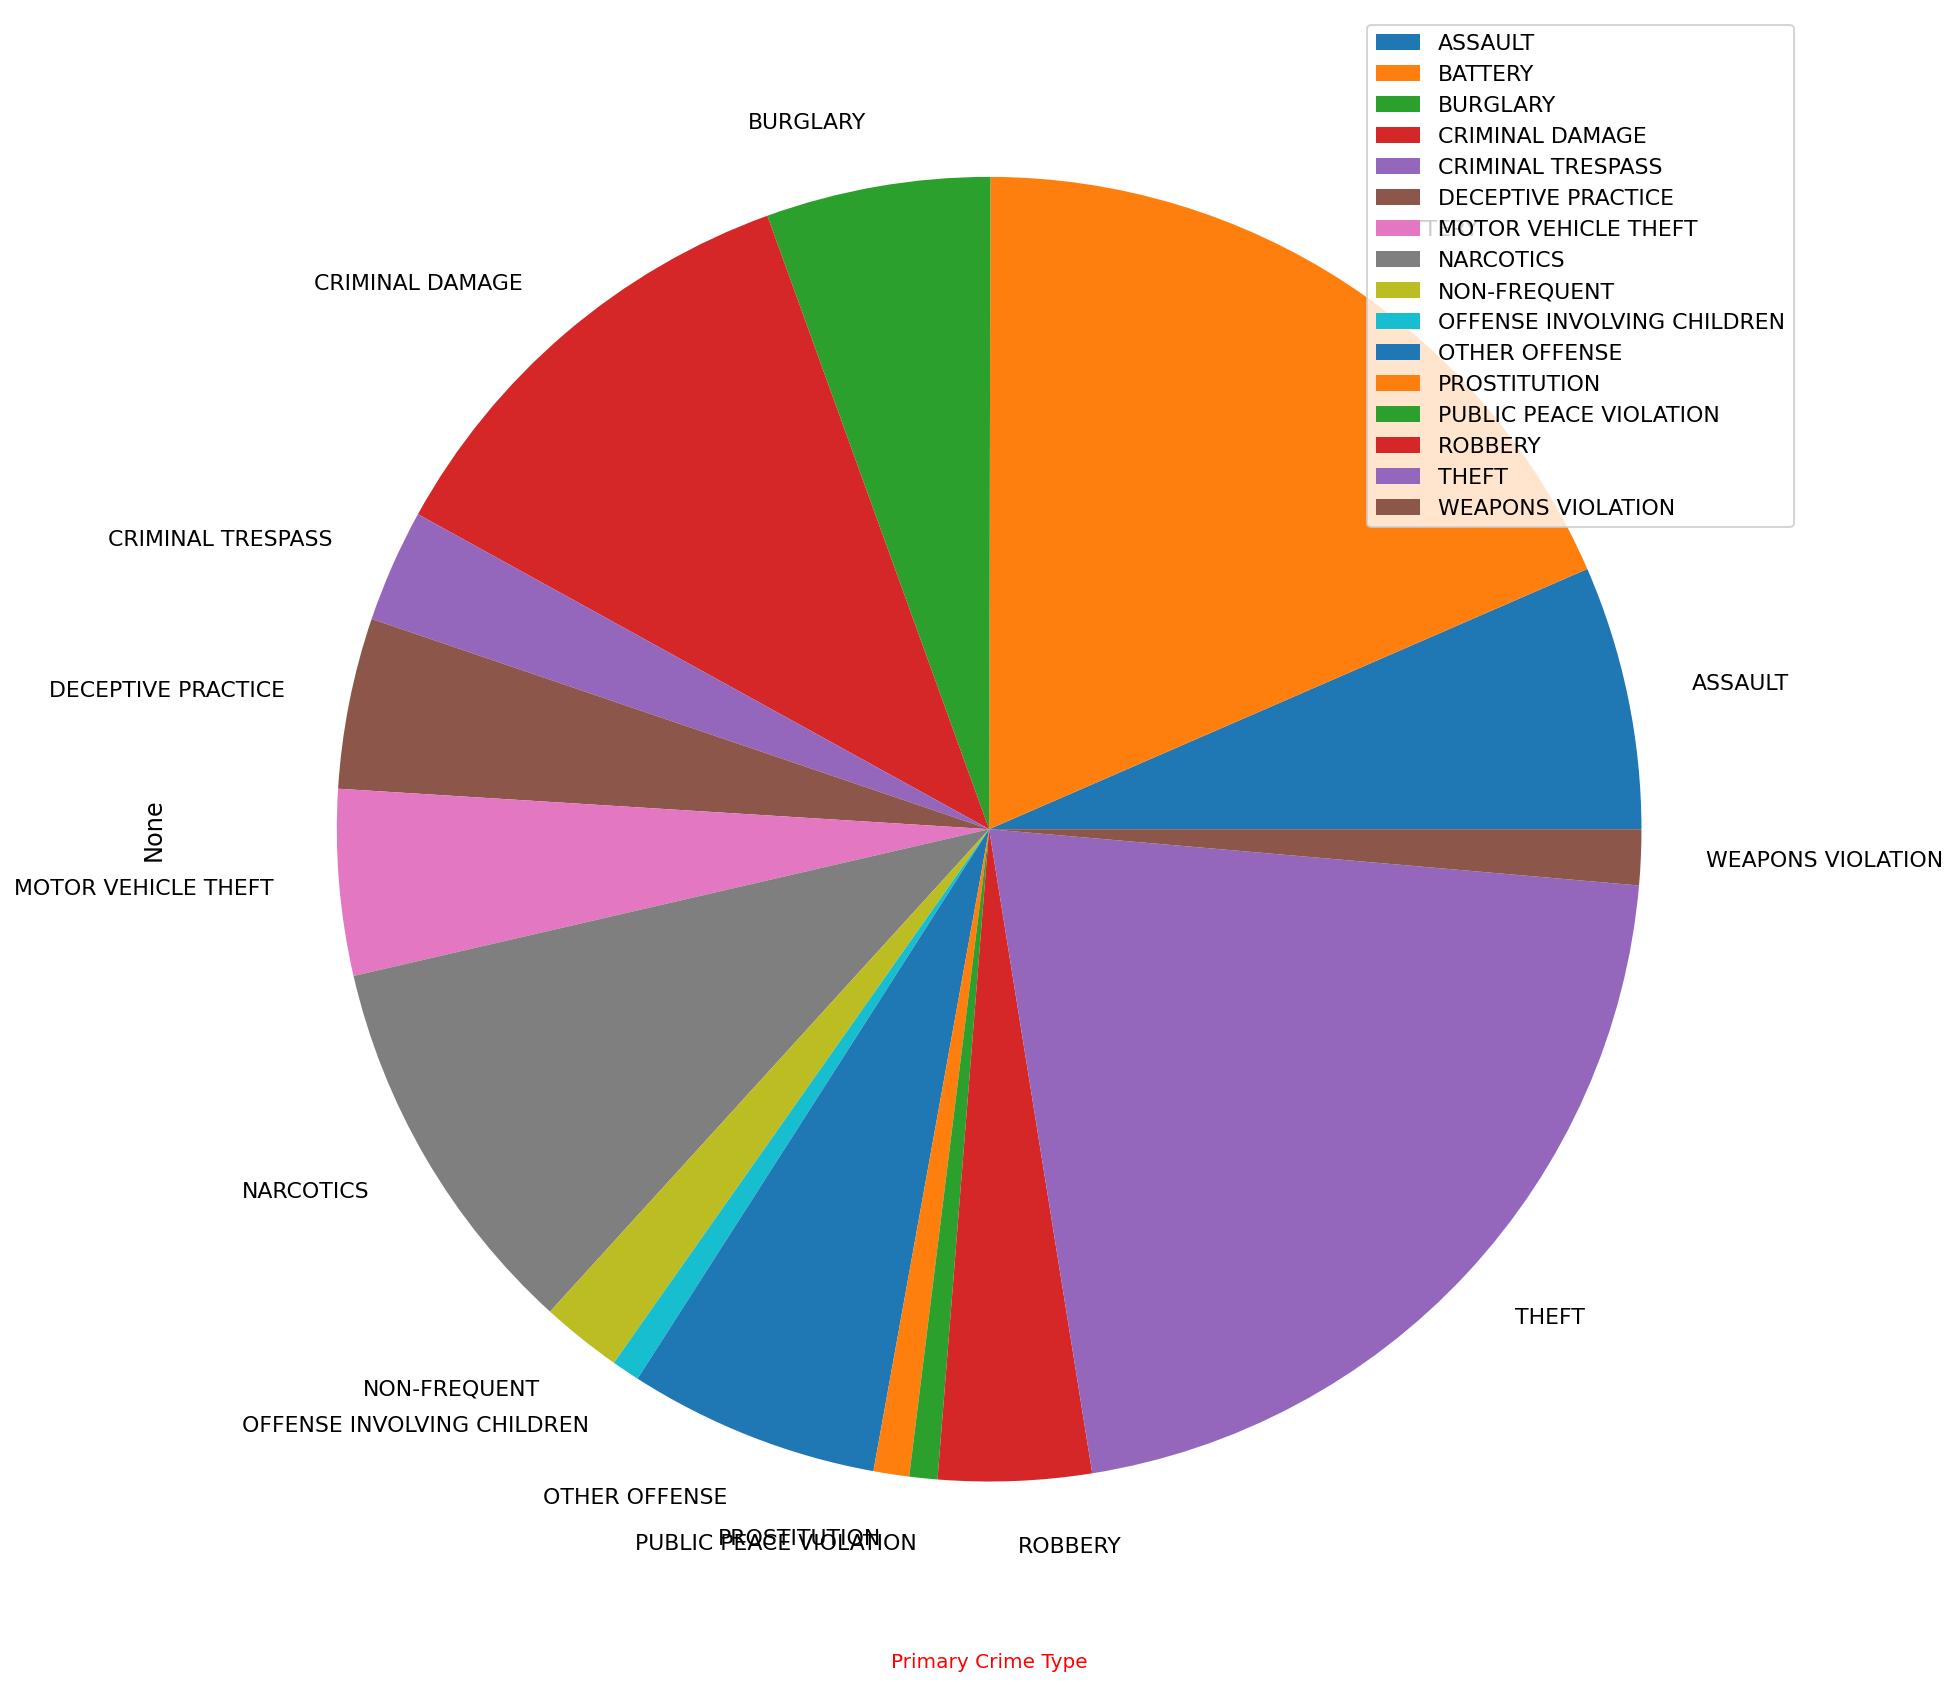

In [35]:
primaryVisualizeDF = df.groupby('Primary Type').size()
primaryVisualizeDF.plot.pie(figsize = (15,15))
plt.xlabel('Primary Crime Type', fontsize=10, color = 'red')
plt.legend();

plt.savefig('missing_values')

## Check the crimes' decription to have a literal concept about the crimes 

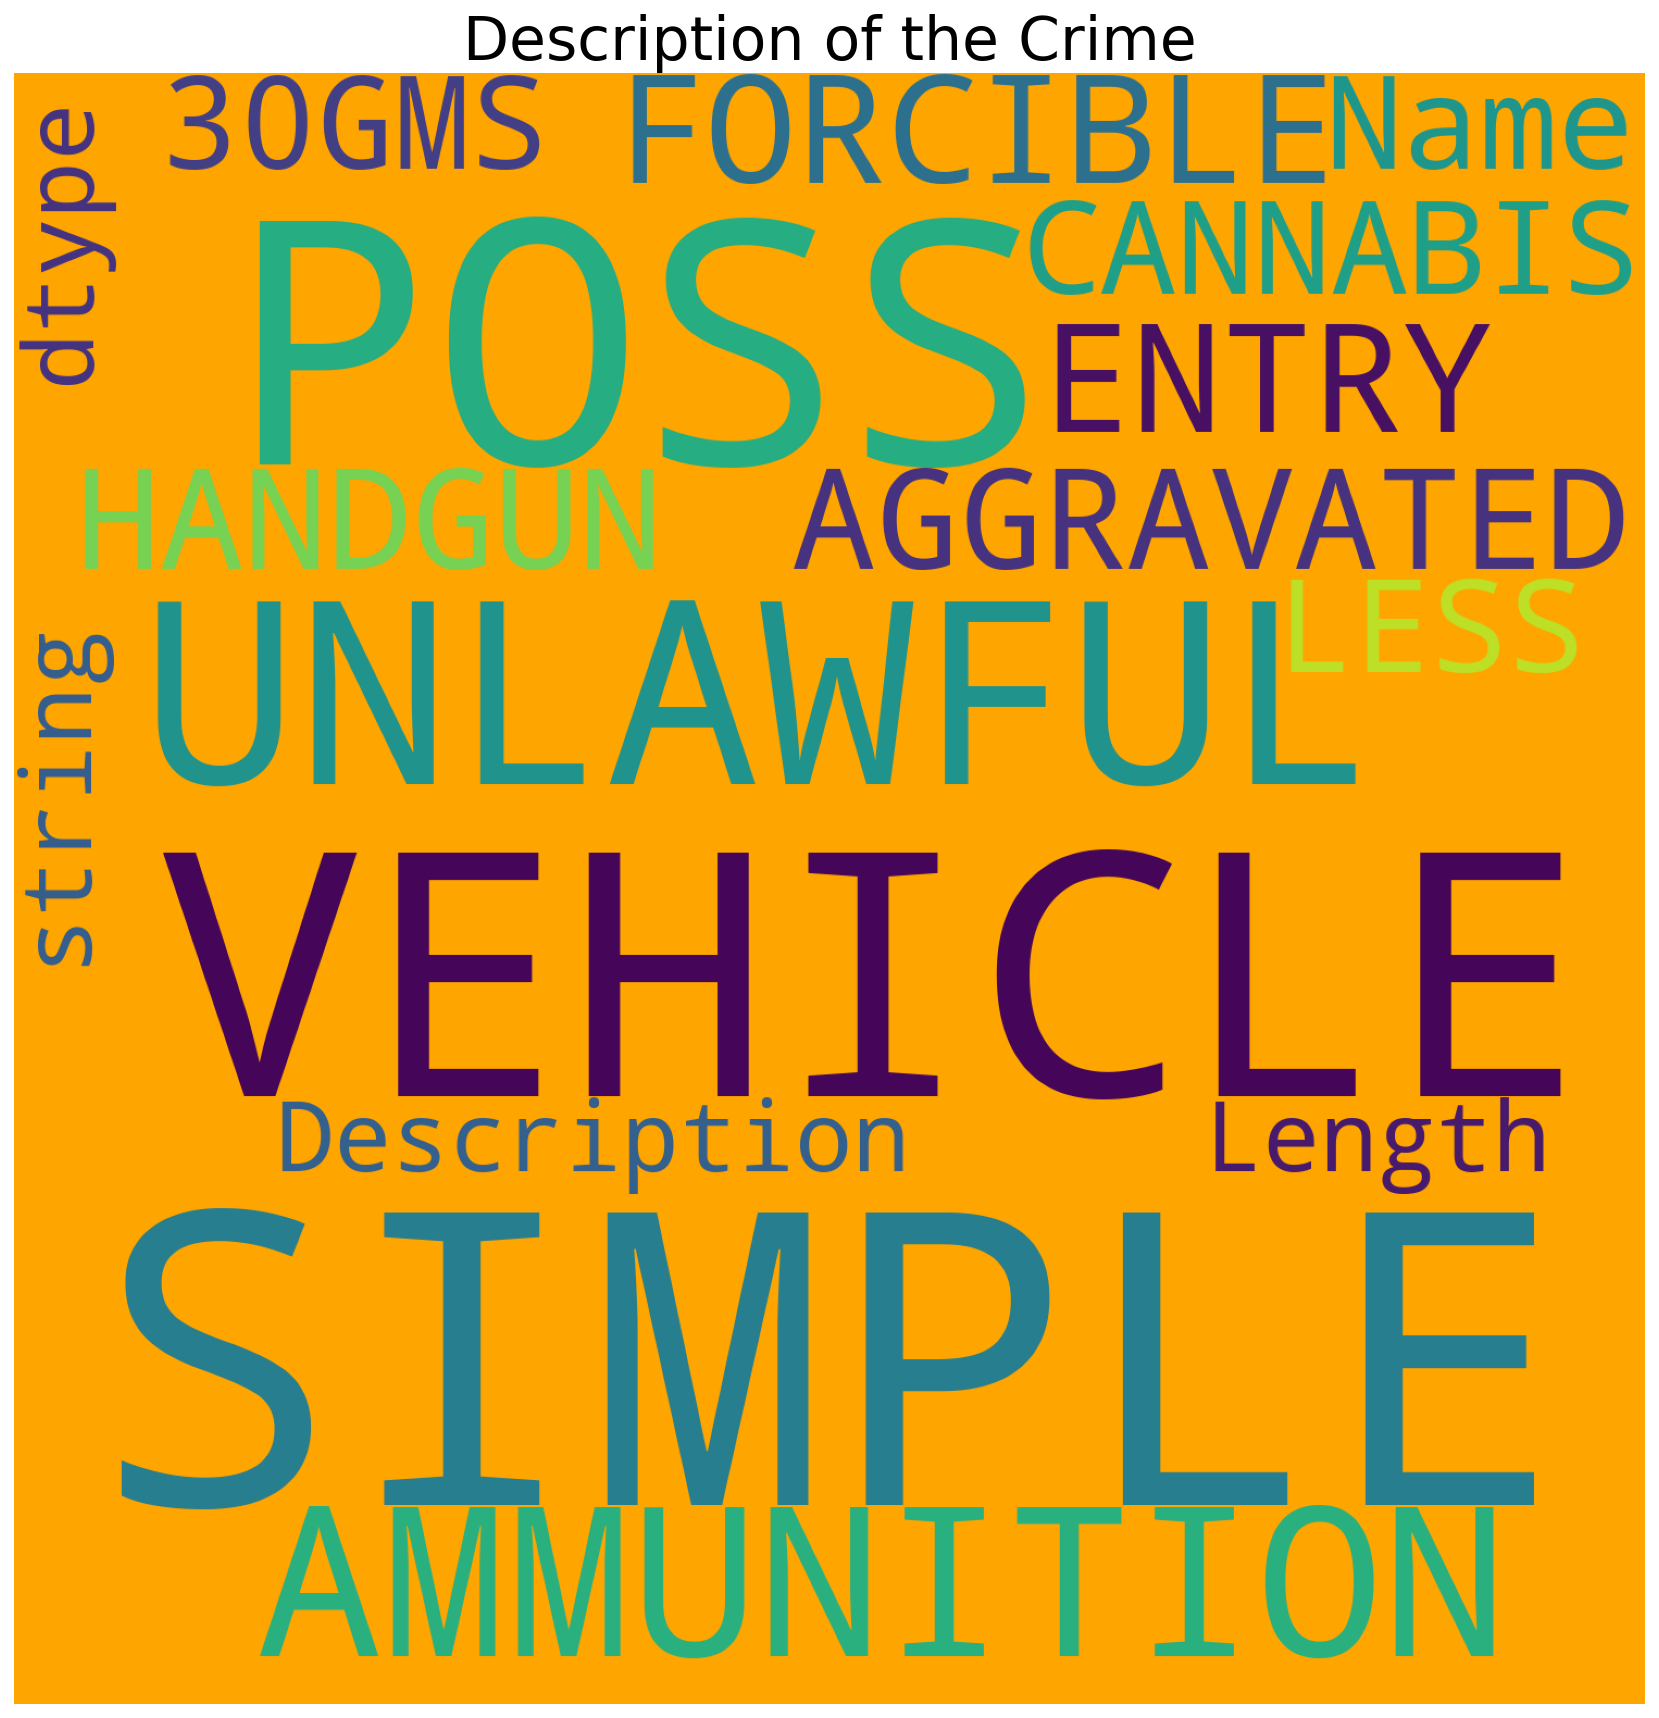

In [36]:

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')
wc = WordCloud(background_color = 'orange', \
               width = 1500, height = 1500)\
               .generate(str(df['Description']))
plt.title('Description of the Crime', fontsize = 30)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [37]:
# check the count of the FBI code
fbi_dict = df['FBI Code'].value_counts()
fbi_dict

06     436851
08B    326008
14     237244
26     203553
18     188104
05     114981
08A    103527
07      95269
03      78447
11      75330
04B     56394
04A     36596
15      28775
16      18275
24      16238
10      11277
02       9945
17       9679
20       8183
19       4078
22       3839
09       3468
01A      3459
13        687
12        349
01B        25
Name: FBI Code, dtype: Int64

In [38]:
# check the variable count of the arrest field
arrest_dict = df["Arrest"].value_counts()
arrest_dict

False    1527175
True      543406
Name: Arrest, dtype: int64

In [39]:
domestic_dict = df["Domestic"].value_counts()
domestic_dict

False    1781975
True      288606
Name: Domestic, dtype: int64

In [40]:
district_dict = df["District"].value_counts()
district_dict

8.0     140529
11.0    134041
6.0     122164
7.0     121491
4.0     119329
25.0    117947
3.0     105170
9.0     101266
12.0    101054
2.0      94041
5.0      92539
18.0     91830
19.0     91519
15.0     89969
10.0     89841
1.0      83872
14.0     79361
16.0     69336
22.0     68282
24.0     61857
17.0     59455
20.0     35639
31.0        49
Name: District, dtype: int64

In [41]:
loc_dict = df['Location Description'].value_counts()
loc_dict

STREET               530430
RESIDENCE            342699
APARTMENT            239322
SIDEWALK             203853
OTHER                 72077
                      ...  
PRAIRIE                   1
TRUCKING TERMINAL         1
FACTORY                   1
LAKE                      1
SEWER                     1
Name: Location Description, Length: 198, dtype: Int64

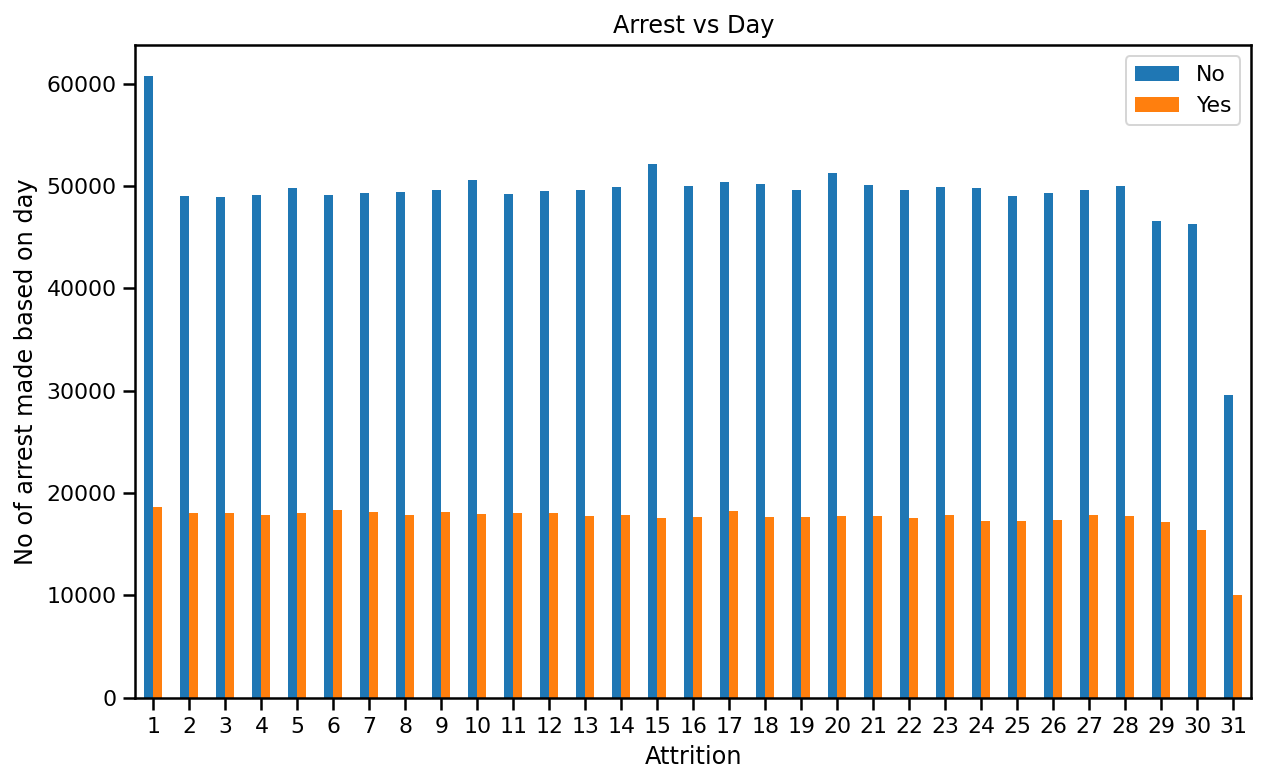

In [42]:
#Create a plot for crosstab

pd.crosstab(df['Day'],df['Arrest']).plot(kind="bar",figsize=(10,6))
plt.title("Arrest vs Day")
plt.xlabel("Attrition")
plt.ylabel("No of arrest made based on day")
plt.legend(["No","Yes"])
plt.xticks(rotation=0)
plt.show()

In [43]:
period_dict = df['Daytime_of_Occurence'].value_counts()
period_dict

Midnight         780579
Night            340784
Afternoon        313855
Evening          219800
Late Morning     179624
Noon             118263
Early Morning    117676
Name: Daytime_of_Occurence, dtype: int64

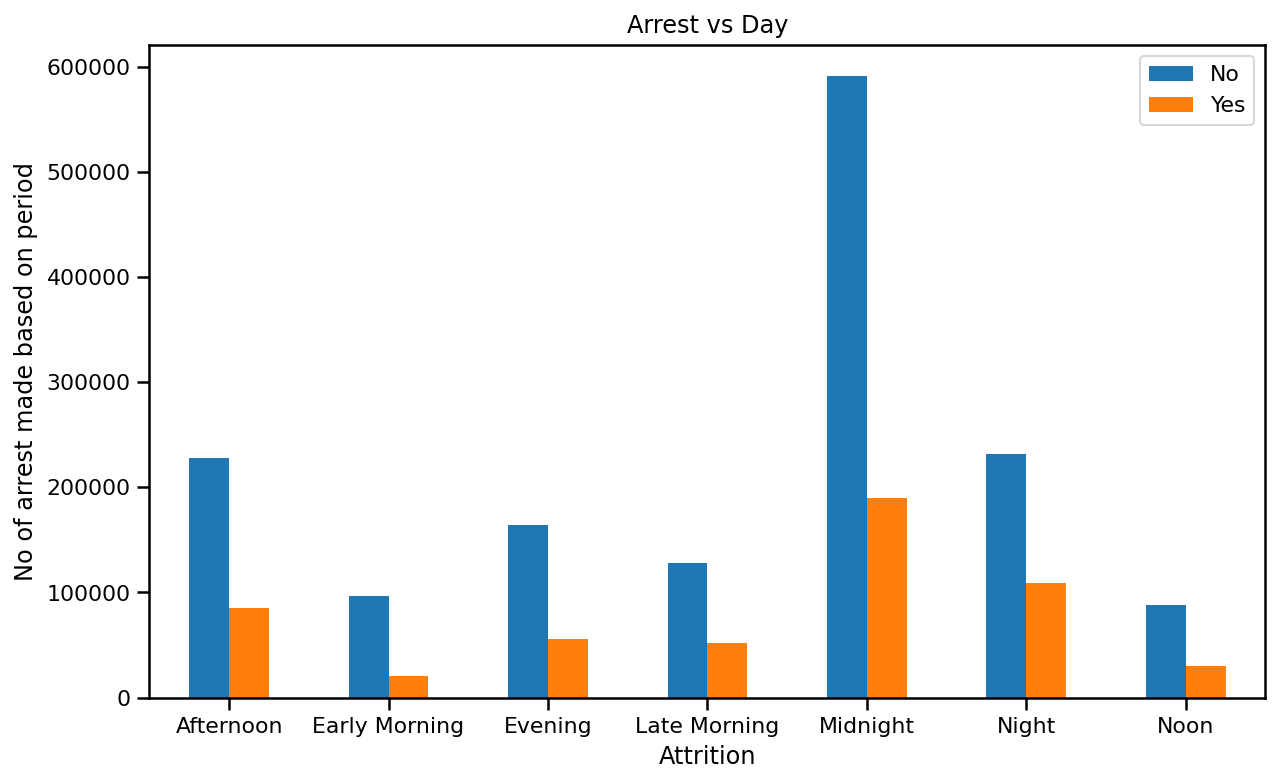

In [44]:
#Create a plot for crosstab

pd.crosstab(df['Daytime_of_Occurence'],df['Arrest']).plot(kind="bar",figsize=(10,6))
plt.title("Arrest vs Day")
plt.xlabel("Attrition")
plt.ylabel("No of arrest made based on period")
plt.legend(["No","Yes"])
plt.xticks(rotation=0)
plt.show()

In [45]:
# copy the dataframe
df_copy = df.copy()

In [46]:
# Encode period using dictionary mapping
df_copy = df_copy.replace({'Daytime_of_Occurence': {'Afternoon': 0, 'Early Morning': 1, 'Evening': 2, 'Late Morning': 3, 'Midnight': 4, 'Night': 5, 'Noon': 6}})

In [47]:
#Encode period using dictionary mapping
df_copy = df_copy.replace({'month': {'Jan': 0, 'Feb': 1, 'Mar': 2, 'Apr': 3, 'May': 4, 'Jun': 5, 
                             'Jul': 6, 'Aug': 7, 'Sep': 8, 'Oct': 9, 'Nov': 10, 'Dec': 11}})

In [48]:
# Encode day using dictionary mapping
df_copy = df_copy.replace({'day': {'Sun ': 0, 'Mon ': 1, 'Tue ': 2, 'Wed ': 3,
                           'Thu ': 4, 'Fri ': 5,'Sat ': 6, 'Sun ': 7}})

In [49]:
df_copy

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month,day,period,Month,Day,Hour,Minutes,Seconds,Year Updated,Month Updated,Day Updated,Hour Updated,Minutes Updated,Seconds Updated,Season,Daytime_of_Occurence
0,0,6407111,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,2018-02-28 15:56:25,41.739980,-87.555120,"(41.739979622, -87.555120042)",6,6,Afternoon,7,26,14,30,0,2018,2,28,15,56,25,Summer,0
1,1,11398199,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,2018-08-07 16:02:59,41.726922,-87.599747,"(41.726922145, -87.599746995)",6,2,Morning,7,31,10,57,0,2018,8,7,16,2,59,Summer,3
2,2,5488785,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,2018-02-28 15:56:25,41.994138,-87.734959,"(41.994137622, -87.734959049)",3,5,Morning,4,27,10,30,0,2018,2,28,15,56,25,Spring,3
3,3,11389116,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,2018-07-30 15:52:24,41.881217,-87.730590,"(41.881217483, -87.730589961)",6,1,Morning,7,23,8,55,0,2018,7,30,15,52,24,Summer,1
4,4,12420431,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,2021-07-18 16:56:02,41.874174,-87.668082,"(41.874173691, -87.668082118)",6,7,Morning,7,11,6,40,0,2021,7,18,16,56,2,Summer,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278720,2278720,6643262,HP714246,2008-12-03 05:30:00,056XX W CORNELIA AVE,0810,THEFT,OVER $500,VEHICLE NON-COMMERCIAL,False,False,1633,16.0,38.0,15.0,06,1138111.0,1922705.0,2008,2018-02-28 15:56:25,41.944038,-87.767774,"(41.944038314, -87.767774454)",11,3,Morning,12,3,5,30,0,2018,2,28,15,56,25,Winter,4
2278721,2278721,10716043,HZ474139,2016-10-14 14:35:00,006XX N CLARK ST,0560,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,1832,18.0,42.0,8.0,08A,1175423.0,1904617.0,2016,2018-02-10 15:50:01,41.893647,-87.631177,"(41.893646656, -87.631177143)",9,5,Afternoon,10,14,14,35,0,2018,2,10,15,50,1,Autumn,0
2278723,2278723,4737434,HM342705,2006-05-10 19:49:00,007XX E OAKWOOD BLVD,0560,ASSAULT,SIMPLE,APARTMENT,False,True,213,2.0,4.0,38.0,08A,1181989.0,1878827.0,2006,2018-02-28 15:56:25,41.822727,-87.607863,"(41.82272748, -87.607863136)",4,3,Evening,5,10,19,49,0,2018,2,28,15,56,25,Spring,4
2278724,2278724,11122832,JA476827,2017-10-18 22:30:00,002XX W ERIE ST,1360,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,1831,18.0,42.0,8.0,26,1174469.0,1904732.0,2017,2018-02-10 15:50:01,41.893984,-87.634677,"(41.893983593, -87.634677382)",9,3,Night,10,18,22,30,0,2018,2,10,15,50,1,Autumn,5



### Observations
From the above analysis, we can infer that:

- The 'Unnamed: 0' field does not have any importance in the data
- The 'ID' and 'Case Number' are not required for crime prediction at a location, hence they will be dropped
- The Date field will be dropped since it has been transformed
- The Block field will be dropped
- The IUCR field will be dropped since it relates to the Primary Type column and is a subtype of FBI Code
- 'X Coordinate', 'Y Coordinate', Latitude, Longitude and Location will be dropped as District, Ward and Community Area also give details about location
- The 'Updated On' field will be dropped and all its associates I created
- The 'Year' field is not required for modelling since the model is not a time series forcasting

In [50]:
df_copy = df_copy.drop(['ID', 'Case Number', 'Date','FBI Code','X Coordinate', 'Y Coordinate', 'Updated On',
             'Location', 'Year Updated','Month Updated', 'Day Updated', 'Hour Updated', 'Minutes Updated', 
             'Seconds Updated','Season', 'Daytime_of_Occurence', 'Unnamed: 0' ,'Block', 'IUCR'], axis= 1)



In [51]:
df_copy = df_copy.drop('period', axis=1)


In [65]:
df_copy = df_copy.drop('day', axis=1)
df_copy = df_copy.drop('month', axis=1)

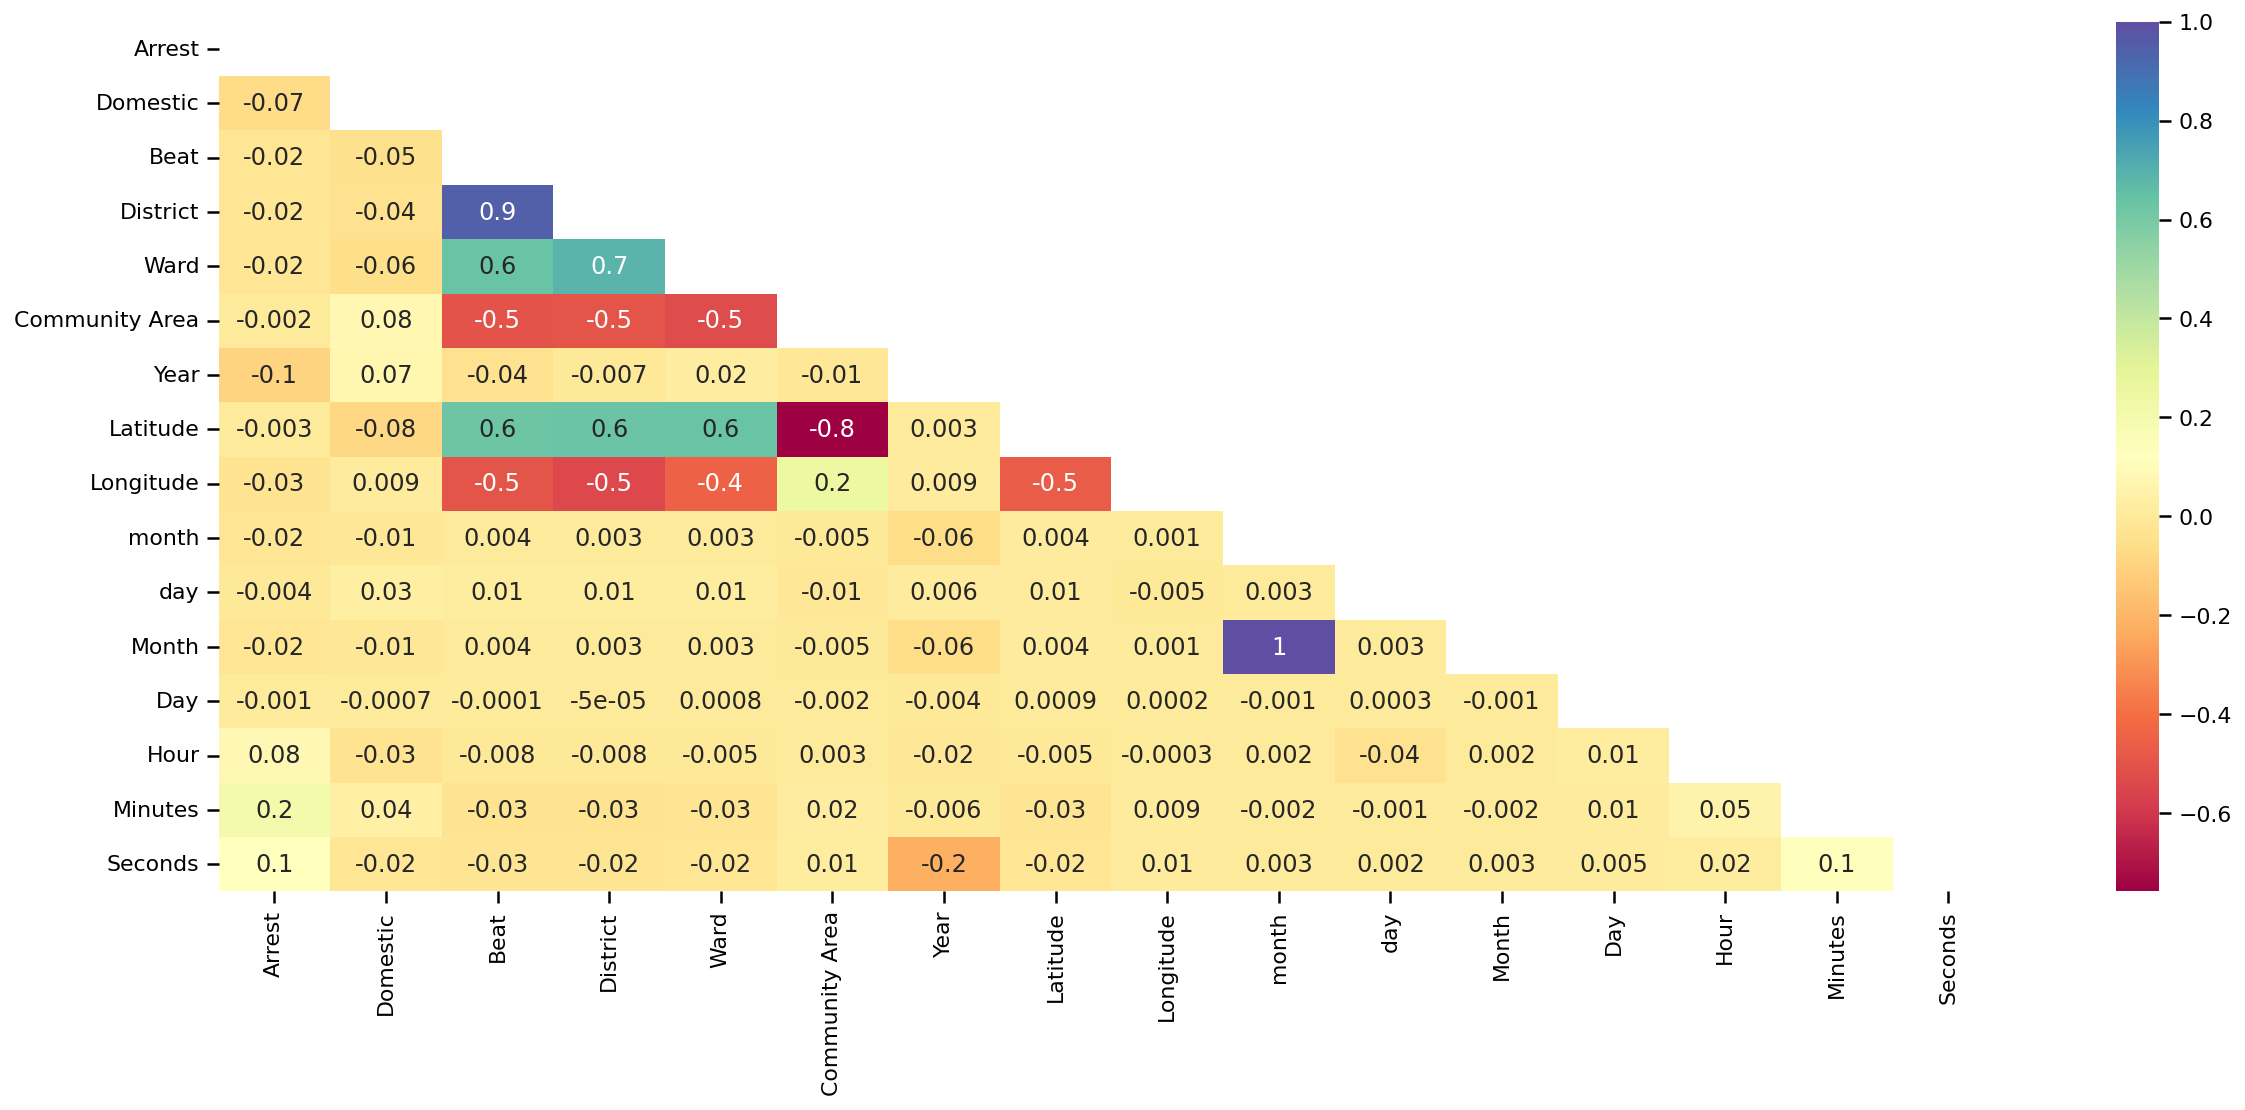

In [52]:
# Plot the heat map  
plt.figure(figsize=(20,8))
mask= np.triu(df_copy.corr())
sns.heatmap(df_copy.corr(), annot = True, mask=mask, fmt='.1g', cmap='Spectral')
plt.show()

In [53]:
df_copy.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,month,day,Month,Day,Hour,Minutes,Seconds
0,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,2008,41.739980,-87.555120,6,6,7,26,14,30,0
1,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,2018,41.726922,-87.599747,6,2,7,31,10,57,0
2,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,2007,41.994138,-87.734959,3,5,4,27,10,30,0
3,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,2018,41.881217,-87.730590,6,1,7,23,8,55,0
4,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,2021,41.874174,-87.668082,6,7,7,11,6,40,0


In [54]:
Obj_Features = ['Primary Type', 'Arrest', 'Domestic', 'Description', 'Location Description','Domestic']

# label encoding
def label_econder_tf(data, features):
    for col_cat in range(len(features)):
        le = LabelEncoder()
        data[Obj_Features[col_cat] ] = le.fit_transform(data.loc[:,features[col_cat]])
    return data



In [55]:
# label encoder data 
df_fs = label_econder_tf(df_copy, Obj_Features)
df_fs.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,month,day,Month,Day,Hour,Minutes,Seconds
0,3,460,171,0,0,423,4.0,10.0,46.0,2008,41.739980,-87.555120,6,6,7,26,14,30,0
1,15,466,139,1,0,413,4.0,8.0,47.0,2018,41.726922,-87.599747,6,2,7,31,10,57,0
2,2,215,145,1,0,1711,17.0,39.0,12.0,2007,41.994138,-87.734959,3,5,4,27,10,30,0
3,0,419,125,0,0,1115,11.0,28.0,26.0,2018,41.881217,-87.730590,6,1,7,23,8,55,0
4,0,25,134,0,0,1231,12.0,27.0,28.0,2021,41.874174,-87.668082,6,7,7,11,6,40,0


In [56]:
df_fs1 = df_fs.reset_index(drop=True)

In [57]:
df_fs1.columns

Index(['Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'Year',
       'Latitude', 'Longitude', 'month', 'day', 'Month', 'Day', 'Hour',
       'Minutes', 'Seconds'],
      dtype='object')

In [58]:
df_fs1

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,month,day,Month,Day,Hour,Minutes,Seconds
0,3,460,171,0,0,423,4.0,10.0,46.0,2008,41.739980,-87.555120,6,6,7,26,14,30,0
1,15,466,139,1,0,413,4.0,8.0,47.0,2018,41.726922,-87.599747,6,2,7,31,10,57,0
2,2,215,145,1,0,1711,17.0,39.0,12.0,2007,41.994138,-87.734959,3,5,4,27,10,30,0
3,0,419,125,0,0,1115,11.0,28.0,26.0,2018,41.881217,-87.730590,6,1,7,23,8,55,0
4,0,25,134,0,0,1231,12.0,27.0,28.0,2021,41.874174,-87.668082,6,7,7,11,6,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070576,14,332,190,0,0,1633,16.0,38.0,15.0,2008,41.944038,-87.767774,11,3,12,3,5,30,0
2070577,0,419,60,1,0,1832,18.0,42.0,8.0,2016,41.893647,-87.631177,9,5,10,14,14,35,0
2070578,0,419,17,0,1,213,2.0,4.0,38.0,2006,41.822727,-87.607863,4,3,5,10,19,49,0
2070579,4,460,135,0,0,1831,18.0,42.0,8.0,2017,41.893984,-87.634677,9,3,10,18,22,30,0


In [59]:
df_fs1.describe()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,month,day,Month,Day,Hour,Minutes,Seconds
count,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06
mean,6.590697e+00,2.854867e+02,1.271848e+02,2.624413e-01,1.393841e-01,1.182230e+03,1.127909e+01,2.271360e+01,3.753332e+01,2.010366e+03,4.184171e+01,-8.767161e+01,5.597684e+00,3.993408e+00,6.597684e+00,1.565439e+01,1.315085e+01,1.974302e+01,2.362965e+00
std,5.182966e+00,1.503895e+02,5.616315e+01,4.399613e-01,3.463469e-01,7.018246e+02,6.940316e+00,1.382901e+01,2.152122e+01,5.699301e+00,8.853018e-02,6.094413e-02,3.316027e+00,1.984072e+00,3.316027e+00,8.834701e+00,6.734803e+00,1.850492e+01,9.400277e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.890000e+02,9.600000e+01,0.000000e+00,0.000000e+00,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,2.005000e+03,4.176819e+01,-8.771391e+01,3.000000e+00,2.000000e+00,4.000000e+00,8.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,3.320000e+02,1.450000e+02,0.000000e+00,0.000000e+00,1.034000e+03,1.000000e+01,2.200000e+01,3.200000e+01,2.010000e+03,4.185545e+01,-8.766594e+01,6.000000e+00,4.000000e+00,7.000000e+00,1.600000e+01,1.400000e+01,1.700000e+01,0.000000e+00
75%,1.300000e+01,4.190000e+02,1.710000e+02,1.000000e+00,0.000000e+00,1.724000e+03,1.700000e+01,3.400000e+01,5.700000e+01,2.015000e+03,4.190639e+01,-8.762820e+01,8.000000e+00,6.000000e+00,9.000000e+00,2.300000e+01,1.900000e+01,3.200000e+01,0.000000e+00
max,1.500000e+01,5.100000e+02,1.970000e+02,1.000000e+00,1.000000e+00,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,2.022000e+03,4.202267e+01,-8.752453e+01,1.100000e+01,7.000000e+00,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01


In [69]:
df_fs1.shape

(2070581, 19)

In [67]:
X = df_fs1.drop(['District','Day'], axis=1).to_numpy()

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)



In [72]:
rescaledXDF = pd.DataFrame(rescaledX, columns = ['Primary Type', 'Description', 'Location Description', 'Arrest','Domestic', 'Beat', 'Ward', 'Community Area', 'Year','Latitude', 'Longitude', 'month', 'day', 'Month', 'Hour', 'Minutes', 'Seconds'])

In [73]:
target_col = df_fs1[['District','Day']]
df_fs1 = rescaledXDF.join(target_col)
df_fs1.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,Year,Latitude,Longitude,month,day,Month,Hour,Minutes,Seconds,District,Day
0,0.200000,0.901961,0.868020,0.0,0.0,0.128713,0.183673,0.597403,0.333333,0.947681,0.992650,0.545455,0.833333,0.545455,0.608696,0.508475,0.0,4.0,26
1,1.000000,0.913725,0.705584,1.0,0.0,0.124587,0.142857,0.610390,0.809524,0.945264,0.981928,0.545455,0.166667,0.545455,0.434783,0.966102,0.0,4.0,31
2,0.133333,0.421569,0.736041,1.0,0.0,0.660066,0.775510,0.155844,0.285714,0.994719,0.949441,0.272727,0.666667,0.272727,0.434783,0.508475,0.0,17.0,27
3,0.000000,0.821569,0.634518,0.0,0.0,0.414191,0.551020,0.337662,0.809524,0.973820,0.950490,0.545455,0.000000,0.545455,0.347826,0.932203,0.0,11.0,23
4,0.000000,0.049020,0.680203,0.0,0.0,0.462046,0.530612,0.363636,0.952381,0.972517,0.965509,0.545455,1.000000,0.545455,0.260870,0.677966,0.0,12.0,11


In [74]:
df_fs1.describe()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,Community Area,Year,Latitude,Longitude,month,day,Month,Hour,Minutes,Seconds,District,Day
count,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06,2.070581e+06
mean,4.393798e-01,5.597778e-01,6.456083e-01,2.624413e-01,1.393841e-01,4.419267e-01,4.431347e-01,4.874457e-01,4.460007e-01,9.665086e-01,9.646624e-01,5.088804e-01,4.989013e-01,5.088804e-01,5.717759e-01,3.346274e-01,4.005025e-02,1.127909e+01,1.565439e+01
std,3.455311e-01,2.948814e-01,2.850921e-01,4.399613e-01,3.463469e-01,2.895316e-01,2.822247e-01,2.794963e-01,2.713953e-01,1.638469e-02,1.464286e-02,3.014570e-01,3.306787e-01,3.014570e-01,2.928175e-01,3.136427e-01,1.593267e-01,6.940316e+00,8.834701e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.333333e-01,3.705882e-01,4.873096e-01,0.000000e+00,0.000000e+00,2.103960e-01,1.836735e-01,2.987013e-01,1.904762e-01,9.529016e-01,9.544992e-01,2.727273e-01,1.666667e-01,2.727273e-01,3.913043e-01,0.000000e+00,0.000000e+00,6.000000e+00,8.000000e+00
50%,4.000000e-01,6.509804e-01,7.360406e-01,0.000000e+00,0.000000e+00,3.807756e-01,4.285714e-01,4.155844e-01,4.285714e-01,9.690513e-01,9.660232e-01,5.454545e-01,5.000000e-01,5.454545e-01,6.086957e-01,2.881356e-01,0.000000e+00,1.000000e+01,1.600000e+01
75%,8.666667e-01,8.215686e-01,8.680203e-01,1.000000e+00,0.000000e+00,6.654290e-01,6.734694e-01,7.402597e-01,6.666667e-01,9.784791e-01,9.750906e-01,7.272727e-01,8.333333e-01,7.272727e-01,8.260870e-01,5.423729e-01,0.000000e+00,1.700000e+01,2.300000e+01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,3.100000e+01


In [75]:
# I will draw a sample dataset to work with. this is due to unavailability of computing resources.
# Generating 25% sample of data frame
df_fs1 = df_fs1.sample(frac =.25)

In [76]:
# subset the dataset for feature selection
yDis = df_fs1['District']
yDay = df_fs1['Day']
Xdf = df_fs1.drop(['District','Day'], axis=1)

In [77]:
# Feature Extraction with RFE for Day

X1 = Xdf.to_numpy()
y1 = yDay.to_numpy()


model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=7)

# fit the model on all available data
result = rfe.fit(X1, y1)

print("Num Features: {}".format(result.n_features_)) 
print("Selected Features: {}".format(result.support_))
print("Feature Ranking: {}".format(result.ranking_))

Num Features: 7
Selected Features: [False  True False False False  True False False  True  True  True False
 False False  True  True False]
Feature Ranking: [ 4  1  2  9 11  1  3  5  1  1  1  8  6  7  1  1 10]


In [78]:
# Feature Extraction with RFE for District

X2 = Xdf.to_numpy()
y2 = yDis.to_numpy()

model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=7)

# fit the model on all available data
result = rfe.fit(X2, y2)

print("Num Features: {}".format(result.n_features_)) 
print("Selected Features: {}".format(result.support_))
print("Feature Ranking: {}".format(result.ranking_))

Num Features: 7
Selected Features: [False  True False False False  True False False  True  True  True False
  True False False  True False]
Feature Ranking: [ 7  1  8 11 10  1  3  5  1  1  1  6  1  4  2  1  9]


# Single Target Classification

In [79]:
# Evaluate District using Cross Validation

X = df_fs1.drop(['District','Day'], axis=1)
Y = df_fs1['District']

pipeline = Pipeline(steps=[('scaler',StandardScaler()),
                          ('model',DecisionTreeClassifier())])

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

results = cross_val_score(pipeline, X, Y, cv=kfold)

print("Accuracy: {:.2f}%, {:.2f}%".format(results.mean()*100.0, results.std()*100.0))

Accuracy: 99.94%, 0.01%


In [85]:
# Evaluate District using cross validation score

X = df_fs1.drop(['District','Day'], axis=1)
y = df_fs1['District']

clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()

# implementing a for loop for the models
for clf, label in zip([clf1, clf2], 
                      ['Decision Tree',
                       'Random Forest']):

    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 1.00 (+/- 0.00) [Decision Tree]
Accuracy: 1.00 (+/- 0.00) [Random Forest]


In [80]:
# Evaluate Day using Cross Validation

X = df_fs1.drop(['District','Day',], axis=1)
Y = df_fs1['Day']

pipeline = Pipeline(steps=[('scaler',StandardScaler()),
                          ('model',DecisionTreeClassifier())])

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

results = cross_val_score(pipeline, X, Y, cv=kfold)

print("Accuracy: {:.2f}%, {:.2f}%".format(results.mean()*100.0, results.std()*100.0))



Accuracy: 22.72%, 0.18%


In [86]:
# Evaluate Day using cross validation score

X = df_fs1.drop(['District','Day'], axis=1)
y = df_fs1['Day']

clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()

# implementing a for loop for the models
for clf, label in zip([clf1, clf2], 
                      ['Decision Tree',
                       'Random Forest']):

    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy score: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy score: 0.22 (+/- 0.00) [Decision Tree]
Accuracy score: 0.13 (+/- 0.00) [Random Forest]


# Multioutput Classification


In [83]:
# Implementing Multioutput Classifier with RandomForestClassifier

# declare the independent and dependent variables
X = df_fs1.drop(['District','Day'], axis=1)
y = df_fs1[['District','Day']]

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

# instantiate a pipeline for scaling and classifier
pipe_lr = Pipeline(steps=[('scaler',StandardScaler()),
                          ('multi',MultiOutputClassifier(RandomForestClassifier()))])

# fit pipeline to the model
pipe_lr.fit(X_train, y_train) 

# print the score of the model
result = pipe_lr.score(X_test, y_test) 

print(f'Accuracy Score: {result}')

Accuracy Score: 0.1232265941334652


In [84]:
# Implementing Multioutput Classifier with DecisionTreeClassifier

# declare the independent and dependent variables
x = df_fs1.drop(['District','Day'], axis=1)
y = df_fs1[['District','Day']]

# split data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=7)


# instantiate a pipeline for scaling and classifier
pipe_lr = Pipeline(steps=[('scaler',StandardScaler()),
                          ('multi',MultiOutputClassifier(DecisionTreeClassifier()))])

# fit pipeline to the model
pipe_lr.fit(x_train, y_train) 

# print the score of the model
result = pipe_lr.score(x_test,y_test) 

print(f'Accuracy Score: {result}')

Accuracy Score: 0.2241214106883442
